#Predicting Highway Fuel Efficiency Using Multiple Linear Regression

## Describing the Dataset

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url="/content/cars.csv"
df=pd.read_csv(url)
df=pd.DataFrame(df)
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [164]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [165]:
df.shape

(5076, 18)

In [166]:
df.dtypes

,0
Dimensions.Height,int64
Dimensions.Length,int64
Dimensions.Width,int64
Engine Information.Driveline,object
Engine Information.Engine Type,object
Engine Information.Hybrid,bool
Engine Information.Number of Forward Gears,int64
Engine Information.Transmission,object
Fuel Information.City mpg,int64
Fuel Information.Fuel Type,object


In [167]:
#list numerical variables
numerical_cols=df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

In [168]:
#list categorical variable
categorical_variables=df.select_dtypes(include=['object']).columns
print(categorical_variables)

Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Transmission', 'Fuel Information.Fuel Type',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year'],
      dtype='object')


## Data Cleaning

In [169]:
df.isnull().sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


In [170]:
df.nunique()

,0
Dimensions.Height,198
Dimensions.Length,208
Dimensions.Width,138
Engine Information.Driveline,4
Engine Information.Engine Type,535
Engine Information.Hybrid,1
Engine Information.Number of Forward Gears,5
Engine Information.Transmission,11
Fuel Information.City mpg,27
Fuel Information.Fuel Type,4


In [171]:
print('Number of Duplicated row =',df.duplicated().sum())

Number of Duplicated row = 18


In [172]:
#Handling Duplicates
df.drop_duplicates(inplace=True)
print('Number of Duplicated row =',df.duplicated().sum())

Number of Duplicated row = 0


In [173]:
df.drop(['Engine Information.Hybrid'],axis=1,inplace=True) #Irrelevant Feature (only one unique value)
df.drop(['Identification.ID'],axis=1,inplace=True) #Irrelevant Feature (high cardinality)

In [174]:
# Check for outliers in numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(df.shape) #shape of dataset after removal of outliers


(4794, 16)


## Handle Categorical Variables

In [175]:

# Target variable
target = 'Fuel Information.Highway mpg'



# Columns for One-Hot Encoding (low cardinality)
one_hot_encoding_cols = [
    'Engine Information.Driveline',
    'Fuel Information.Fuel Type',
    'Identification.Classification'
]

# Perform One-Hot Encoding
df=pd.get_dummies(df,columns=one_hot_encoding_cols)

df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Make,Identification.Model Year,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,140,143,202,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,6 Speed Automatic Select Shift,18,25,Audi,2009 Audi A3,...,True,False,False,False,False,False,False,True,True,False
1,140,143,202,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,22,28,Audi,2009 Audi A3,...,False,False,True,False,False,False,False,True,True,False
2,140,143,202,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Manual,21,30,Audi,2009 Audi A3,...,False,False,True,False,False,False,False,True,False,True
3,140,143,202,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,21,28,Audi,2009 Audi A3,...,True,False,False,False,False,False,False,True,True,False
5,91,17,62,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,6,6 Speed Manual,16,27,Audi,2009 Audi A5,...,True,False,False,False,False,False,False,True,False,True


In [176]:
# Columns to target encode (high cardinality)
target_encoding_cols = ['Identification.Make','Engine Information.Transmission', 'Identification.Model Year', 'Engine Information.Engine Type']

# Perform target encoding
for i in target_encoding_cols:
    df[i] = df.groupby(i)[target].transform('mean')

In [177]:
#convert boolean column to numeric
df[df.columns] = df[df.columns].astype(float)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Make,Identification.Model Year,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,140.0,143.0,202.0,25.000000,6.0,24.175536,18.0,25.0,25.086207,27.75,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,140.0,143.0,202.0,29.333333,6.0,24.175536,22.0,28.0,25.086207,27.75,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,140.0,143.0,202.0,29.333333,6.0,26.951735,21.0,30.0,25.086207,27.75,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,140.0,143.0,202.0,29.333333,6.0,24.175536,21.0,28.0,25.086207,27.75,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,91.0,17.0,62.0,26.500000,6.0,26.951735,16.0,27.0,25.086207,26.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


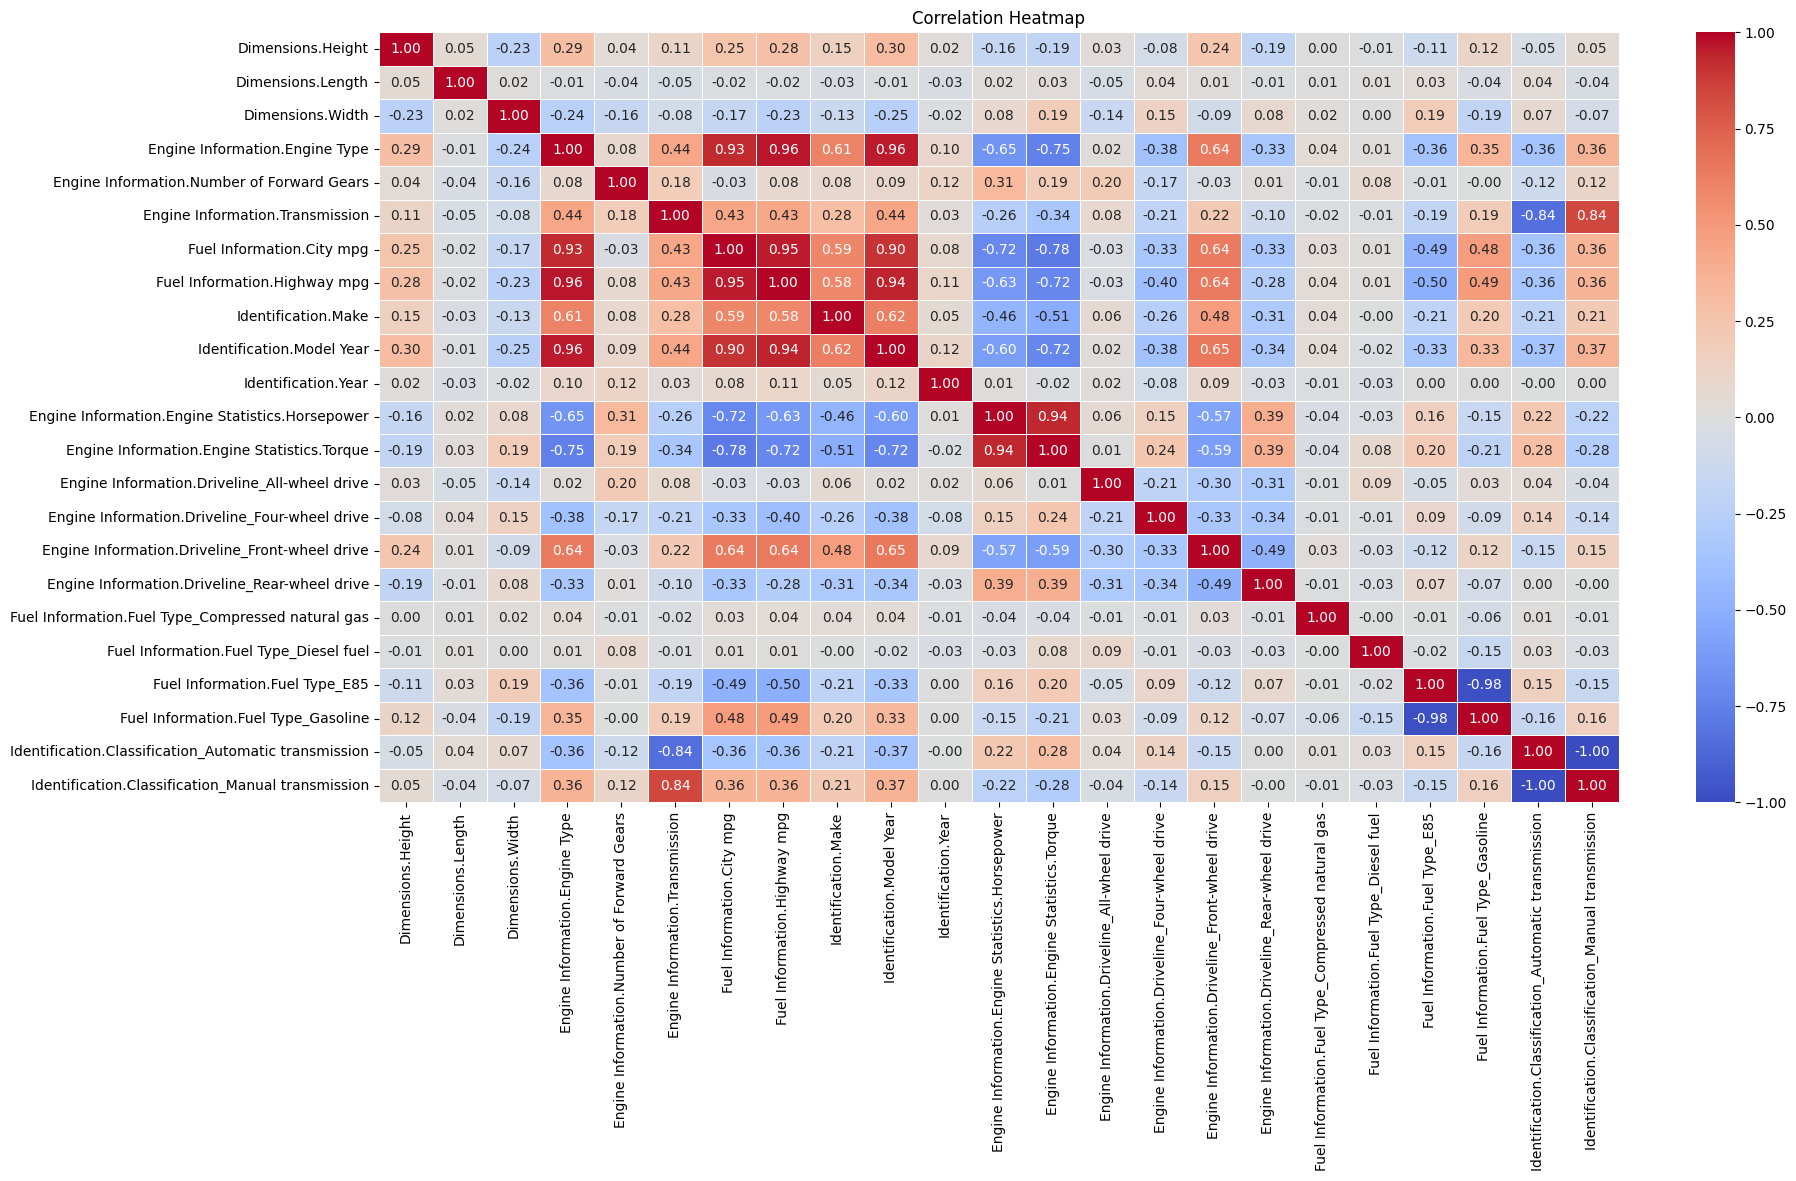

In [178]:
#correlation heatmap
corr_matrix = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

## Feature Scaling

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[df.columns]=scaler.fit_transform(df[df.columns])
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Make,Identification.Model Year,...,Engine Information.Driveline_All-wheel drive,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,0.545455,0.557312,0.794466,0.446494,0.666667,0.302398,0.476190,0.482759,0.489386,0.539906,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.545455,0.557312,0.794466,0.606396,0.666667,0.302398,0.666667,0.586207,0.489386,0.539906,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.545455,0.557312,0.794466,0.606396,0.666667,0.650990,0.619048,0.655172,0.489386,0.539906,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.545455,0.557312,0.794466,0.606396,0.666667,0.302398,0.619048,0.586207,0.489386,0.539906,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.351779,0.059289,0.241107,0.501845,0.666667,0.650990,0.380952,0.551724,0.489386,0.492958,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,0.003953,0.992095,0.790514,0.374539,0.333333,0.000000,0.476190,0.482759,0.787817,0.421596,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5070,0.003953,0.992095,0.790514,0.374539,0.333333,0.000000,0.428571,0.448276,0.787817,0.421596,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5071,0.043478,0.992095,0.790514,0.374539,0.333333,0.000000,0.476190,0.482759,0.787817,0.421596,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5074,0.782609,0.822134,0.430830,0.446494,0.666667,0.302398,0.428571,0.482759,0.444636,0.436620,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Feature Selection using RFE

In [180]:
from sklearn.linear_model import Ridge

X = df.drop('Fuel Information.Highway mpg', axis=1)
y = df['Fuel Information.Highway mpg']

ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=5)  # Selecting top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['Engine Information.Engine Type', 'Fuel Information.City mpg',
       'Identification.Model Year',
       'Fuel Information.Fuel Type_Compressed natural gas',
       'Fuel Information.Fuel Type_E85'],
      dtype='object')


## Linearity

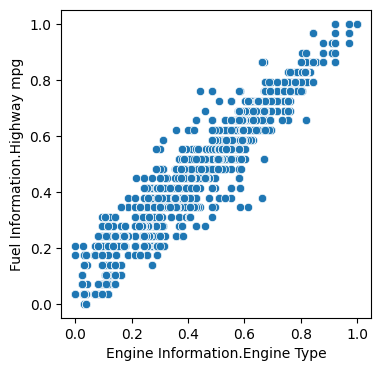

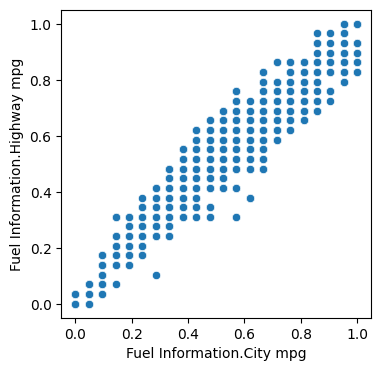

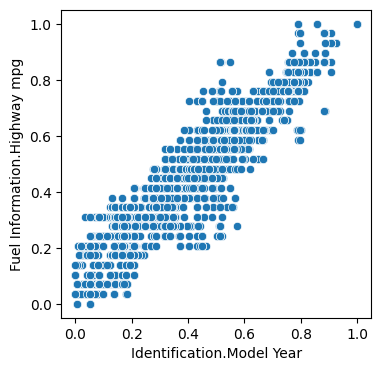

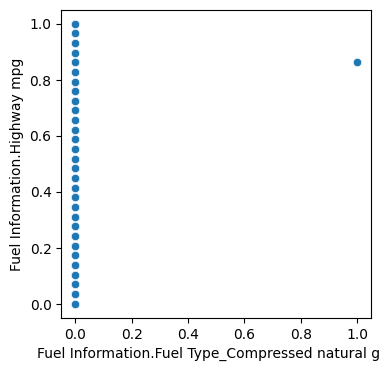

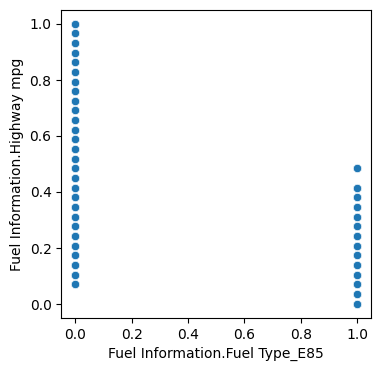

In [181]:
for i in selected_features:
  x=i
  plt.figure(figsize=(4, 4))
  sns.scatterplot(x=x,y='Fuel Information.Highway mpg',data=df)

## Multicolinearity

In [182]:
#checking multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             Feature        VIF
0                     Engine Information.Engine Type  86.437063
1                          Fuel Information.City mpg  40.237995
2                          Identification.Model Year  60.816360
3  Fuel Information.Fuel Type_Compressed natural gas   1.002722
4                     Fuel Information.Fuel Type_E85   1.095054


## PCA

In [183]:
from sklearn.decomposition import PCA
# Extract features with high VIF
high_vif_features = ['Engine Information.Engine Type', 'Fuel Information.City mpg','Identification.Model Year']


# Apply PCA
pca = PCA(n_components=2)  # Reduce to a single component
X_pca = pca.fit_transform(df[high_vif_features])

# Create a new column in the DataFrame for the PCA component
df[['PCA1',"PCA2"]] = X_pca

# Drop the original correlated features
df = df.drop(columns=high_vif_features)

print("Transformed DataFrame with PCA feature added:")
df.head()

Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.Highway mpg,Identification.Make,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission,PCA1,PCA2
0,0.545455,0.557312,0.794466,0.666667,0.302398,0.482759,0.489386,0.0,0.3750,0.318707,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.117293,-0.060203
1,0.545455,0.557312,0.794466,0.666667,0.302398,0.586207,0.489386,0.0,0.2500,0.251732,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.320517,0.055118
2,0.545455,0.557312,0.794466,0.666667,0.650990,0.655172,0.489386,0.0,0.2500,0.251732,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.292999,0.017567
3,0.545455,0.557312,0.794466,0.666667,0.302398,0.586207,0.489386,0.0,0.2500,0.251732,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.292999,0.017567
5,0.351779,0.059289,0.241107,0.666667,0.650990,0.551724,0.489386,0.0,0.4125,0.334873,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.067667,-0.120387


In [184]:

selected_features = [ "Fuel Information.Fuel Type_Compressed natural gas","PCA1","PCA2",
       'Fuel Information.Fuel Type_E85']

X = df[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,Fuel Information.Fuel Type_Compressed natural gas,1.002129
1,PCA1,1.206941
2,PCA2,1.181277
3,Fuel Information.Fuel Type_E85,1.386089


## Model Training

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

model=LinearRegression()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)




## Calculating R² value





In [186]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score_value = r2_score(y_test, y_pred)
print("R²=",r2_score_value)
MSE=mean_squared_error(y_test,y_pred)
print('MSE=',MSE)

R²= 0.9646100281534049
MSE= 0.0014098594911258072


## Homoscedasticity

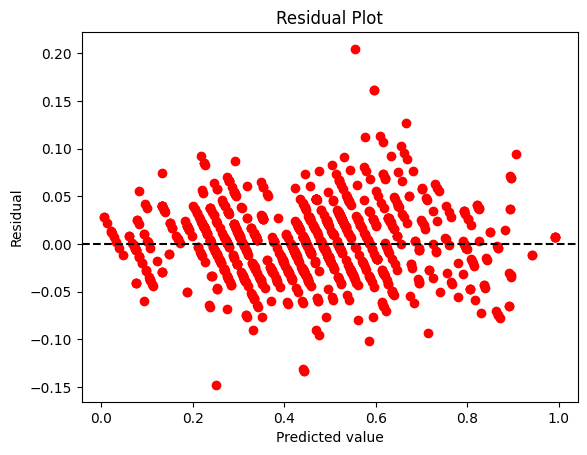

In [187]:
err=y_test-y_pred
plt.scatter(y_pred,err,color='r')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.axhline(y=0,color='black',linestyle='--')
plt.show()